In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the reviews
reviews_df = pd.read_csv('data/raw/reviews.csv')
reviews_df.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [3]:
beers_df = pd.read_csv('data/raw/beers.csv')
beers_df.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [4]:
# merge the reviews and beers dataframes and drop every column not related to 
reviews_beers = pd.merge(reviews_df, beers_df, left_on='beer_id', how='inner', right_on='id')[['date', 'score', 'style', 'beer_id']]
reviews_beers.head()

,date,score,style,beer_id
0,2017-03-17,4.03,American Imperial Stout,271781
1,2018-08-04,4.00,American Imperial Stout,271781
2,2018-04-14,2.90,American Imperial Stout,271781
3,2017-08-16,2.82,American Imperial Stout,271781
4,2017-07-12,4.00,American Imperial Stout,271781


In [5]:
reviews_beers.columns

Index(['date', 'score', 'style', 'beer_id'], dtype='object')

In [6]:
# merge similar beer styles together in a meta_style column

metastyle_beer_dict = dict([
    ('IPA', 
    ['IPA', 'DDHIPA', 'NEIPA']),

    ('Ale', 
    ['Ale']),

    ('Sour', 
    ['Lambic', 'Sour', 'Kvass', 'Gueuze', 'Flanders', 'Gose', 'Sahti', 'Brett', 'Saison', 'Fruit']),

    ('Lager', 
    ['Lager', 'Pilsner', 'Bock', 'Chile', 'Happoshu', 'Pilsener', 'Helles', 'Oktoberfest', 'kölsch']),

    ('Stout', 
    ['Stout', 'Porter']),

    ('Smoked Beer', 
    ['Smoked','Smoke', 'Rauchbier']),

    ('Winter Beer', 
    ['Winter', 'Christmas', 'Pumpkin', 'spice']),

    ('Alcohol-free', 
    ['Low Alcohol Beer']),

    ('Belgian Blonde', 
    ['Dubbel', 'Quadrupel', 'Tripel', 'Belgian']),

    ('Wheat Beer', 
    ['Wheat', 'Weissbier', 'Witbier', 'Hefeweizen', 'Berliner']),

    ('Ambree', 
    ['Altbier', 'Rye']),

    ('Boozy', 
    ['Barleywine', 'Scotch', 'Scottish', 'Champagne', 'Braggot', 'Liquor'])

])

# Create a function to find the metastyle

# make metastyle_beer_dict_lower as a copy of metastyle_beer_dict with lower case values
metastyle_beer_dict_lower = {}
for key, value in metastyle_beer_dict.items():
    metastyle_beer_dict_lower[key] = [x.lower() for x in value]

def find_metastyle(specific_style):
    for metastyle, beer_substyles in metastyle_beer_dict_lower.items():
        for beer_substyle_keyword in beer_substyles:
            if beer_substyle_keyword in specific_style:
                return metastyle
    
    return 'Other'

In [7]:
# Iterate through the styles to find the metastyle
# make reviews_beers['style'] as string and lowercased
reviews_beers['style'] = reviews_beers['style'].astype(str).str.lower()

reviews_beers['meta_style'] = reviews_beers['style'].apply(find_metastyle)
reviews_beers.sample(5)

,date,score,style,beer_id,meta_style
1839759,2014-04-16,4.00,american ipa,916,IPA
8181574,2012-02-17,4.50,german weizenbock,35625,Lager
2832853,2015-03-13,2.00,american adjunct lager,1299,Lager
2318048,2010-05-03,4.18,belgian saison,49708,Sour
5112842,2014-05-02,4.75,american imperial stout,40058,Stout


In [8]:
# compute average for each beer style and declare variable
avg_beer_style = reviews_beers.groupby('meta_style')['score'].mean()
avg_beer_style.head()

meta_style
Alcohol-free      2.508786
Ale               3.844813
Ambree            3.808414
Belgian Blonde    3.904772
Boozy             3.940979
Name: score, dtype: float64

In [9]:
# change the date to week of the year using isocalendar
reviews_beers['date'] = pd.to_datetime(reviews_beers['date'])
reviews_beers['week'] = reviews_beers['date'].apply(lambda x: x.isocalendar()[1])
reviews_beers.sample(5)

,date,score,style,beer_id,meta_style,week
5923647,2014-08-27,3.75,scottish ale,38687,Ale,35
7626792,2018-06-01,3.74,belgian gueuze,349327,Sour,22
1379894,2014-03-20,4.25,american strong ale,25759,Ale,12
1291233,2012-03-29,4.50,english porter,221,Stout,13
8545597,2017-09-15,4.31,new england ipa,240380,IPA,37


In [10]:
# compute the average for each style and week
style_week_grade_df = reviews_beers.groupby(['meta_style', 'week'])['score'].mean()
style_week_grade_df.sample(10)

meta_style   week
Wheat Beer   53      3.886186
Other        48      3.755887
Lager        17      3.440767
Boozy        28      3.883135
Sour         21      3.853758
Winter Beer  8       3.671260
Wheat Beer   45      3.839753
IPA          2       4.034122
Other        6       3.701583
Wheat Beer   9       3.874904
Name: score, dtype: float64

In [11]:
styles = style_week_grade_df.index.get_level_values(0).unique()
for style in styles:
    style_week_grade_df[style] = style_week_grade_df[style] - avg_beer_style[style]

In [12]:
#normalize the result
style_week_grade_df = style_week_grade_df / style_week_grade_df.groupby('meta_style').transform('std')
style_week_grade_df.describe()

count    689.000000
mean      -0.025441
std        0.997604
min       -2.639744
25%       -0.690327
50%       -0.130771
75%        0.509749
max        5.563979
Name: score, dtype: float64

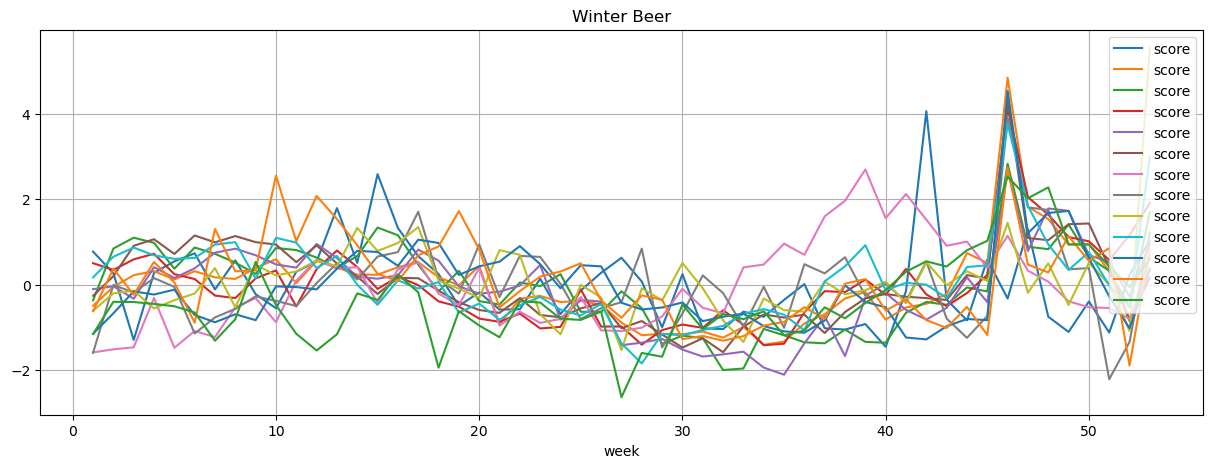

In [13]:
for style in styles:
    style_week_grade_df[style].plot(kind='line', figsize=(15, 5), title=style, grid=True, legend=True)

In [14]:
style_week_grade_df.sample(10)

meta_style    week
Boozy         46      2.668181
Sour          41      0.042233
              36     -1.072330
Boozy         39     -0.309972
Wheat Beer    7       1.302645
Ale           21     -0.924685
Alcohol-free  27      0.629074
Sour          19     -0.654947
IPA           39     -0.322519
Sour          23     -0.288203
Name: score, dtype: float64

In [15]:
style_week_grade_df.describe()


count    689.000000
mean      -0.025441
std        0.997604
min       -2.639744
25%       -0.690327
50%       -0.130771
75%        0.509749
max        5.563979
Name: score, dtype: float64

In [16]:
# remove groupby on style_week_grade_df
style_week_grade_df = style_week_grade_df.reset_index()
style_week_grade_df.sample(5)

,meta_style,week,score
269,IPA,5,0.718772
653,Winter Beer,18,-1.946570
205,Belgian Blonde,47,2.050325
626,Wheat Beer,44,-0.522254
651,Winter Beer,16,0.240497


In [17]:
style_week_grade_df['meta_style'].unique()

array(['Alcohol-free', 'Ale', 'Ambree', 'Belgian Blonde', 'Boozy', 'IPA',
       'Lager', 'Other', 'Smoked Beer', 'Sour', 'Stout', 'Wheat Beer',
       'Winter Beer'], dtype=object)

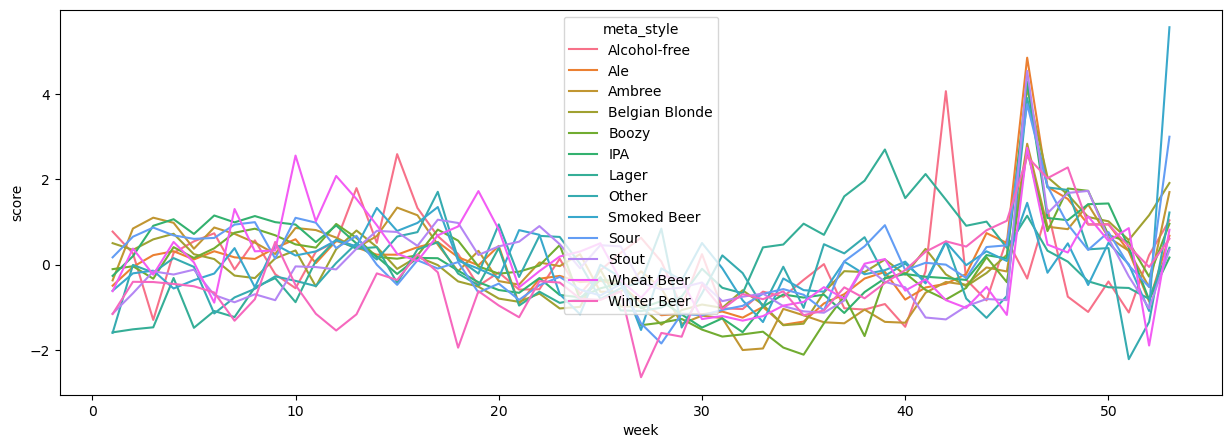

In [18]:
# plot all the scores for each style
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x='week', y='score', hue='meta_style', data=style_week_grade_df, ax=ax)
plt.show()


In [19]:
style_keys = style_week_grade_df['meta_style'].unique()
for style in style_keys:
    style_week_grade_df[style_week_grade_df['meta_style'] == style][['week', 'score']].to_csv('data/website_preparation/bubble_chart/style_week_grade_' + style + '.csv', index=False)